In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

In [3]:
def decision_boundary(epoch, X, y, weights, bias):
        plt.figure()
        plt.rcParams['figure.figsize'] = [4, 3.2]
        plt.scatter(X[:, 0], X[:, 1], c = y)
        x1 = np.linspace(-0.2, 1.2, 100)
        x2 = -(weights[0] * x1 + bias) / weights[1]
        plt.plot(x1, x2, 'r')
        plt.xlim(-0.2, 1.2)
        plt.ylim(-0.2, 1.2)
        plt.title("Interation: " + str(epoch))
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.show(block = False)
        plt.pause(0.1)
        plt.close()

### Perceptron

In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def forward_propagation(self, x):
        return self.activation(np.dot(self.weights, x) + self.bias)
    
    def back_propagation(self, x, y, y_hat):
        self.weights += self.learning_rate * (y - y_hat) * x
        self.bias += self.learning_rate * (y - y_hat)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.converged = False


        for epoch in range(1, self.max_epochs+1):
            errors = 0
            for i in range(len(X)):
                y_hat = self.forward_propagation(X[i])
                self.back_propagation(X[i], y[i], y_hat)
                errors += int(y[i] != y_hat)
            if errors == 0:
                self.converged = True
                break
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)

    def predict(self, X):
        y_pred = []
        for x in X:
            y = self.forward_propagation(x)
            y_pred.append(y)
        return np.array(y_pred)
        

In [5]:
# X and Y for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

Iteration: 1 | Weights: [0.01 0.01] | Bias: 0.0


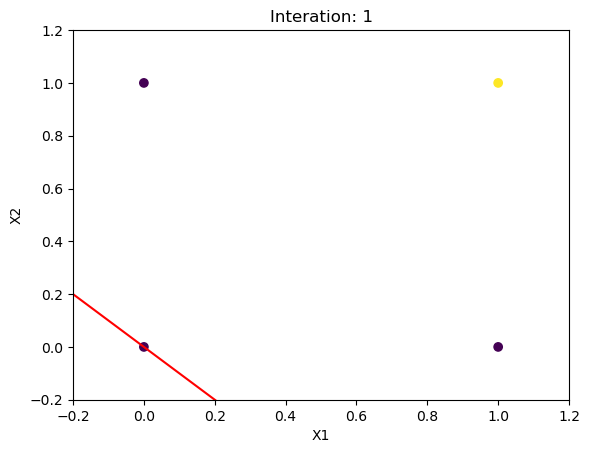

Iteration: 2 | Weights: [0.02 0.01] | Bias: -0.01


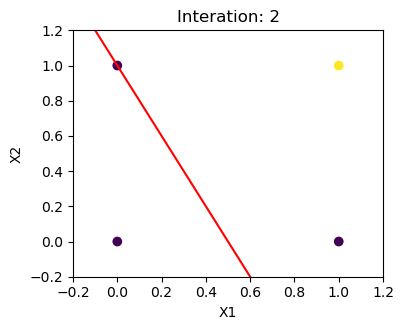

Iteration: 3 | Weights: [0.02 0.01] | Bias: -0.019999999999999997


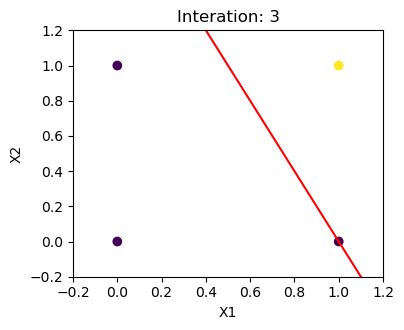

Iteration: 4 | Weights: [0.02 0.02] | Bias: -0.019999999999999997


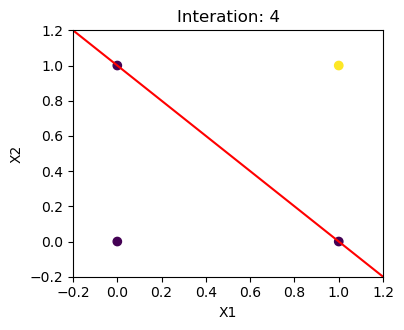

Iteration: 5 | Weights: [0.02 0.01] | Bias: -0.03


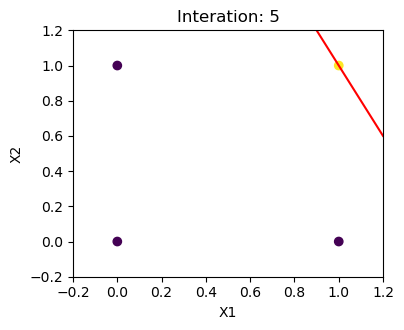

In [6]:
perceptron = Perceptron()
perceptron.fit(X, y)

In [7]:
y_pred = perceptron.predict(X)
print(f"Predicted: {y_pred}")
print(f"Actual: {y}")

Predicted: [0 0 0 1]
Actual: [0 0 0 1]


In [8]:
acc = accuracy(y, y_pred)
print(f"Accuracy percentage: {acc * 100}%")

Accuracy percentage: 100.0%


### LinearSVM

In [9]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0
        

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for epoch in range(1, self.max_epochs+1):
            for i in range(len(X)):
                if y[i] * (np.dot(self.weights, X[i]) + self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / epoch * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]
            print(f"Iteration: {epoch} | Weights: {self.weights} | Bias: {self.bias}")
            decision_boundary(epoch, X, y, self.weights, self.bias)

    def predict(self, X):
        y_pred = []
        for x in X:
            y = self.activation(np.dot(self.weights, x) + self.bias)
            y_pred.append(y)
        return np.array(y_pred)

Iteration: 1 | Weights: [0.01 0.01] | Bias: -0.01


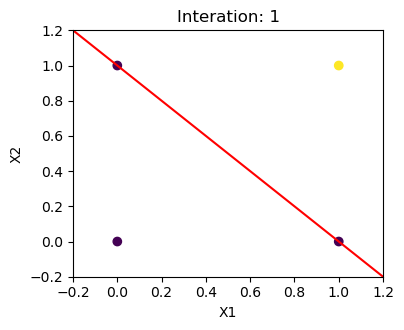

Iteration: 2 | Weights: [0.01960596 0.01960596] | Bias: -0.02


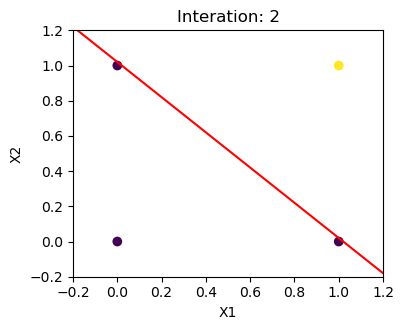

Iteration: 3 | Weights: [0.02908834 0.02908834] | Bias: -0.03


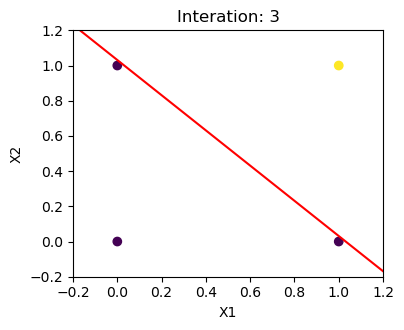

Iteration: 4 | Weights: [0.03851092 0.03851092] | Bias: -0.04


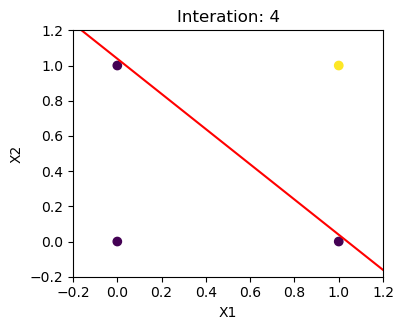

Iteration: 5 | Weights: [0.04789843 0.04789843] | Bias: -0.05


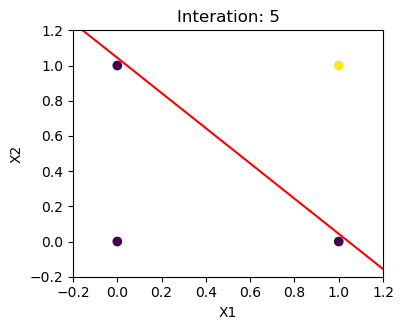

Iteration: 6 | Weights: [0.05726297 0.05726297] | Bias: -0.060000000000000005


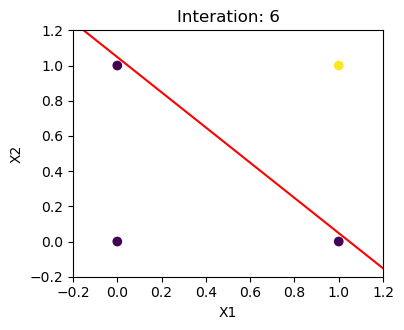

Iteration: 7 | Weights: [0.06661134 0.06661134] | Bias: -0.07


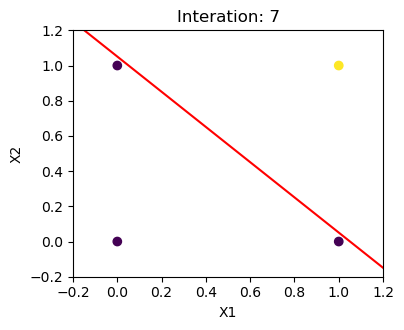

Iteration: 8 | Weights: [0.07594772 0.07594772] | Bias: -0.08


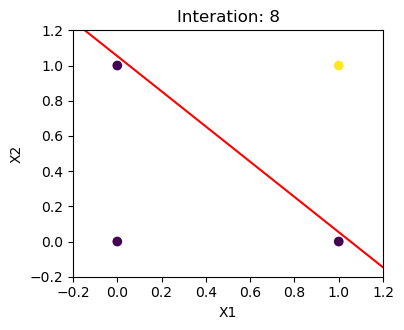

Iteration: 9 | Weights: [0.08527488 0.08527488] | Bias: -0.09


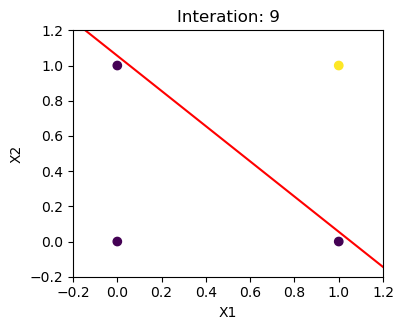

Iteration: 10 | Weights: [0.09459472 0.09459472] | Bias: -0.09999999999999999


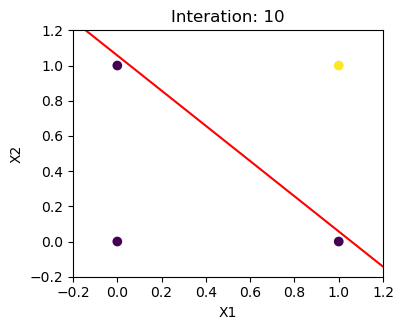

Iteration: 11 | Weights: [0.10390863 0.10390863] | Bias: -0.10999999999999999


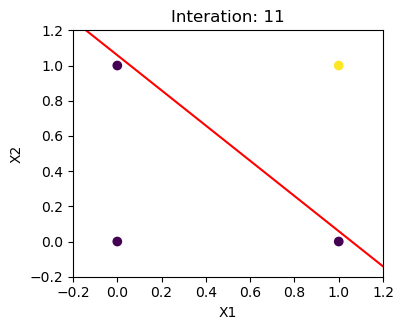

Iteration: 12 | Weights: [0.11321764 0.11321764] | Bias: -0.11999999999999998


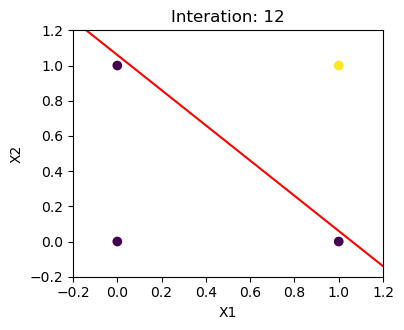

Iteration: 13 | Weights: [0.12252252 0.12252252] | Bias: -0.12999999999999998


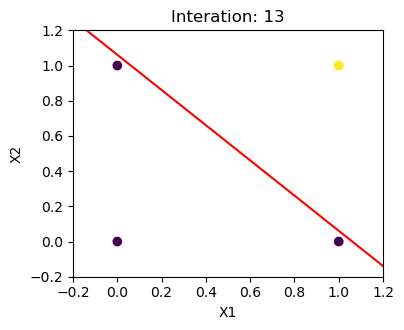

Iteration: 14 | Weights: [0.13182389 0.13182389] | Bias: -0.13999999999999999


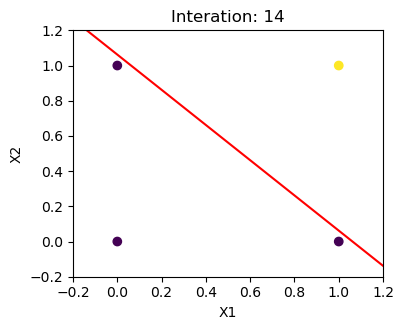

Iteration: 15 | Weights: [0.14112224 0.14112224] | Bias: -0.15


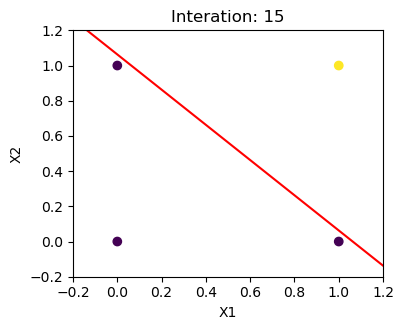

Iteration: 16 | Weights: [0.15041795 0.15041795] | Bias: -0.16


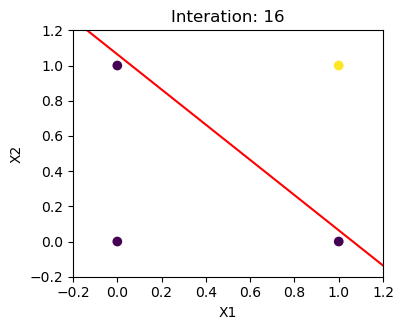

Iteration: 17 | Weights: [0.15971135 0.15971135] | Bias: -0.17


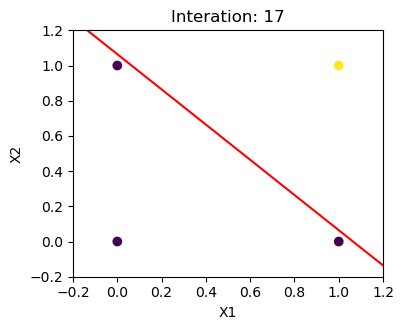

Iteration: 18 | Weights: [0.1690027 0.1690027] | Bias: -0.18000000000000002


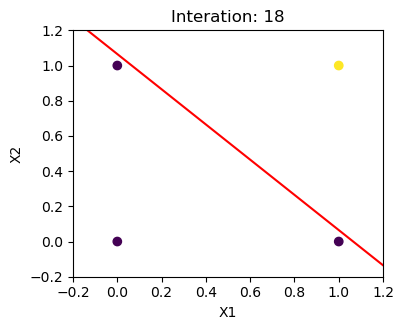

Iteration: 19 | Weights: [0.17829223 0.17829223] | Bias: -0.19000000000000003


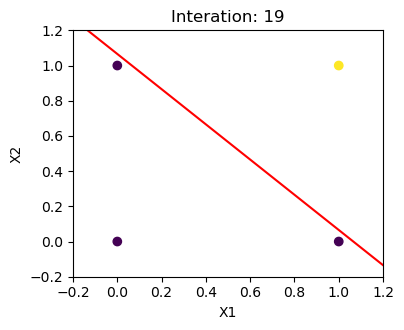

Iteration: 20 | Weights: [0.18758013 0.18758013] | Bias: -0.20000000000000004


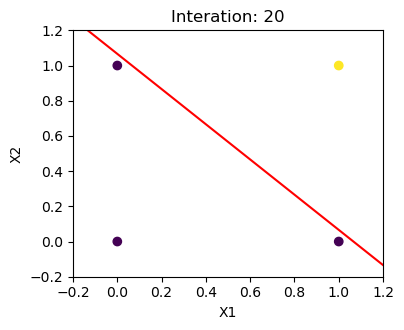

Iteration: 21 | Weights: [0.19686656 0.19686656] | Bias: -0.21000000000000005


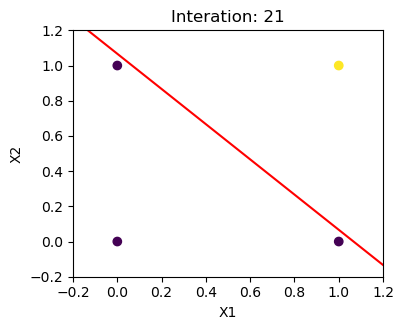

Iteration: 22 | Weights: [0.20615166 0.20615166] | Bias: -0.22000000000000006


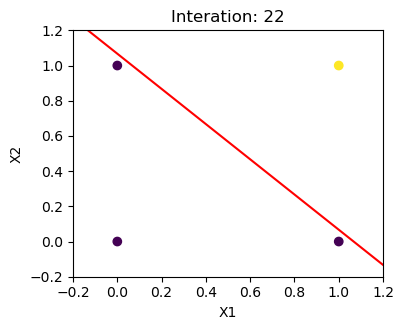

Iteration: 23 | Weights: [0.21543554 0.21543554] | Bias: -0.23000000000000007


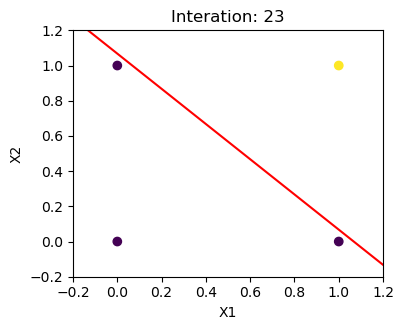

Iteration: 24 | Weights: [0.22471832 0.22471832] | Bias: -0.24000000000000007


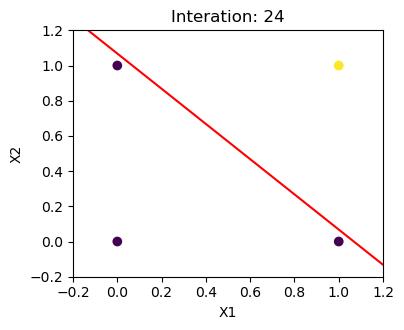

Iteration: 25 | Weights: [0.23400009 0.23400009] | Bias: -0.25000000000000006


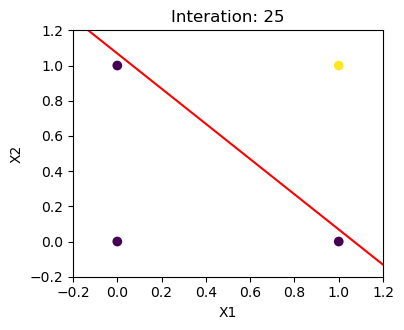

Iteration: 26 | Weights: [0.24328092 0.24328092] | Bias: -0.26000000000000006


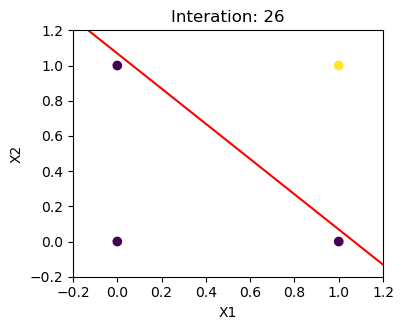

Iteration: 27 | Weights: [0.25256088 0.25256088] | Bias: -0.2700000000000001


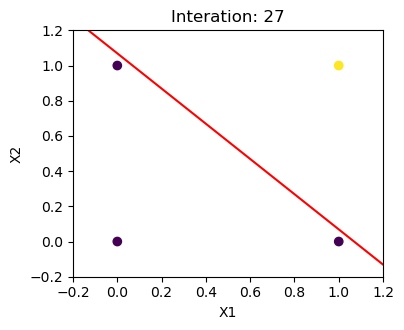

Iteration: 28 | Weights: [0.26184005 0.26184005] | Bias: -0.2800000000000001


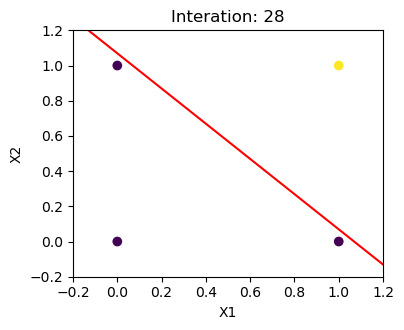

Iteration: 29 | Weights: [0.27111848 0.27111848] | Bias: -0.2900000000000001


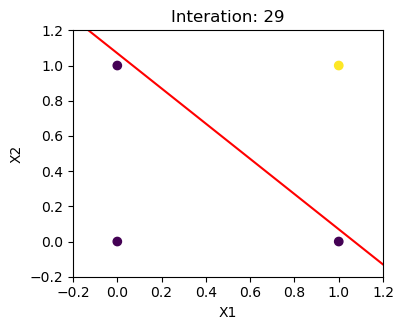

Iteration: 30 | Weights: [0.28039622 0.28039622] | Bias: -0.3000000000000001


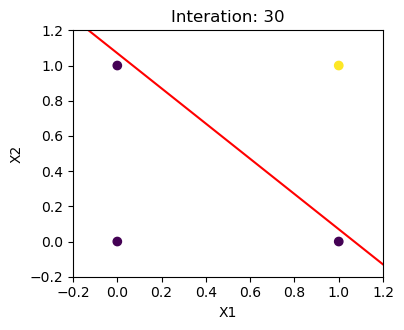

Iteration: 31 | Weights: [0.28967332 0.28967332] | Bias: -0.3100000000000001


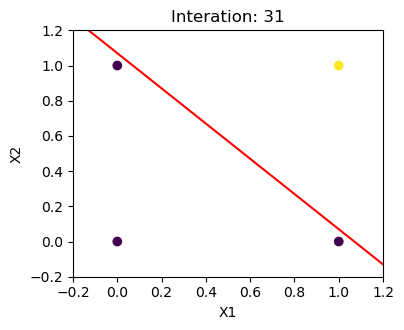

Iteration: 32 | Weights: [0.29894982 0.29894982] | Bias: -0.3200000000000001


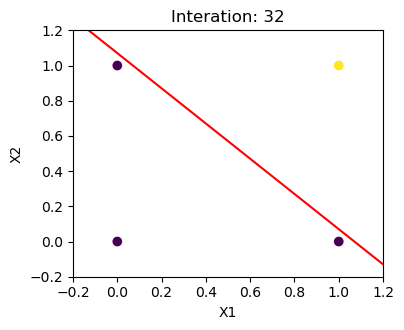

Iteration: 33 | Weights: [0.30822575 0.30822575] | Bias: -0.3300000000000001


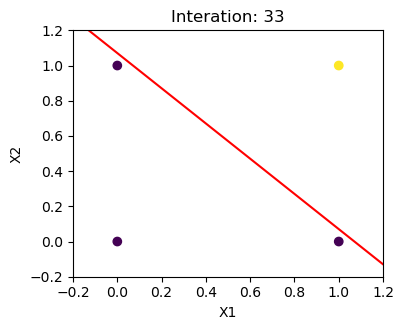

Iteration: 34 | Weights: [0.31750115 0.31750115] | Bias: -0.34000000000000014


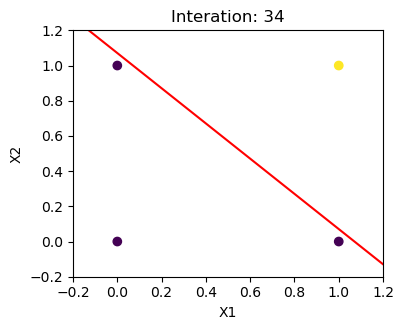

Iteration: 35 | Weights: [0.32677606 0.32677606] | Bias: -0.35000000000000014


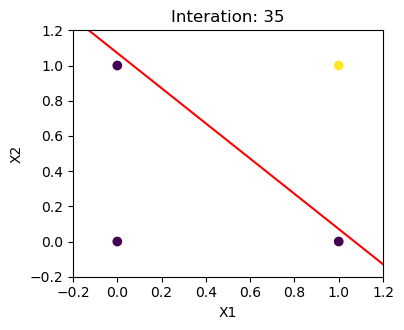

Iteration: 36 | Weights: [0.33605049 0.33605049] | Bias: -0.36000000000000015


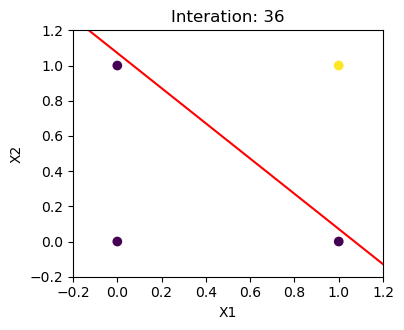

Iteration: 37 | Weights: [0.34532448 0.34532448] | Bias: -0.37000000000000016


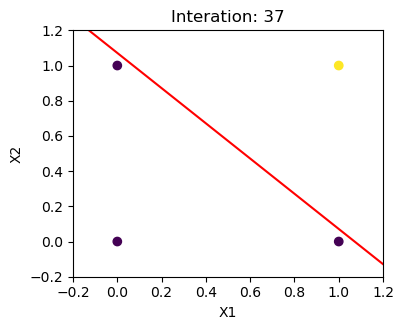

Iteration: 38 | Weights: [0.35459806 0.35459806] | Bias: -0.38000000000000017


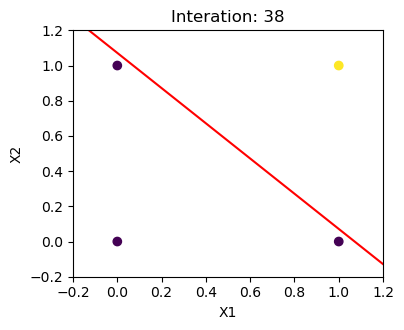

Iteration: 39 | Weights: [0.36387124 0.36387124] | Bias: -0.3900000000000002


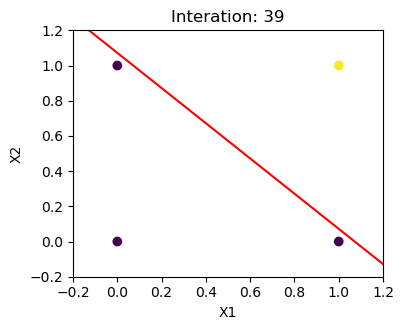

Iteration: 40 | Weights: [0.37314404 0.37314404] | Bias: -0.4000000000000002


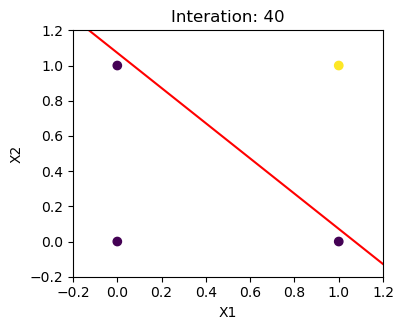

Iteration: 41 | Weights: [0.38241649 0.38241649] | Bias: -0.4100000000000002


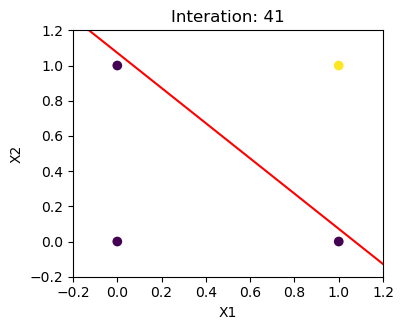

Iteration: 42 | Weights: [0.3916886 0.3916886] | Bias: -0.4200000000000002


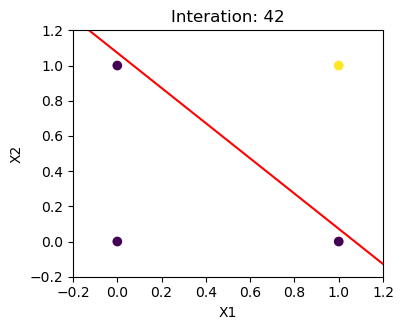

Iteration: 43 | Weights: [0.40096038 0.40096038] | Bias: -0.4300000000000002


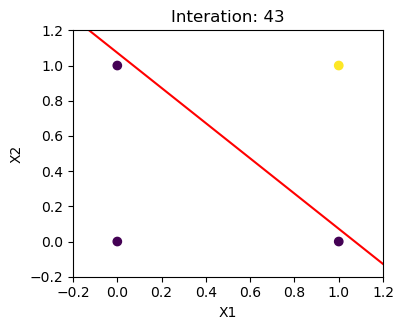

Iteration: 44 | Weights: [0.41023186 0.41023186] | Bias: -0.4400000000000002


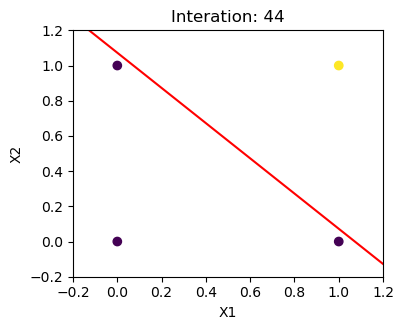

Iteration: 45 | Weights: [0.41950304 0.41950304] | Bias: -0.45000000000000023


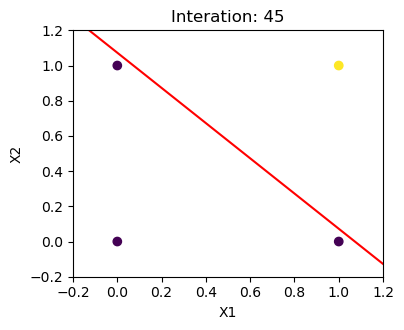

Iteration: 46 | Weights: [0.42877395 0.42877395] | Bias: -0.46000000000000024


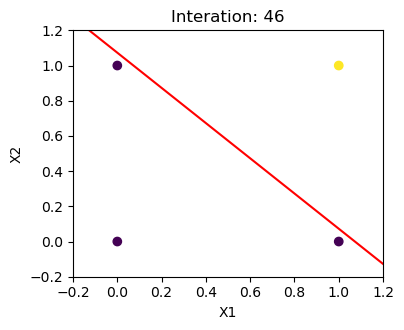

Iteration: 47 | Weights: [0.43804459 0.43804459] | Bias: -0.47000000000000025


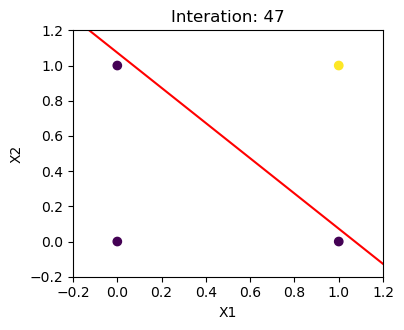

Iteration: 48 | Weights: [0.44731497 0.44731497] | Bias: -0.48000000000000026


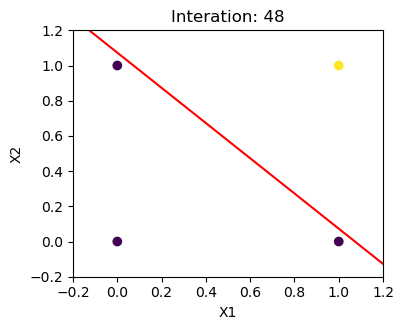

Iteration: 49 | Weights: [0.45658511 0.45658511] | Bias: -0.49000000000000027


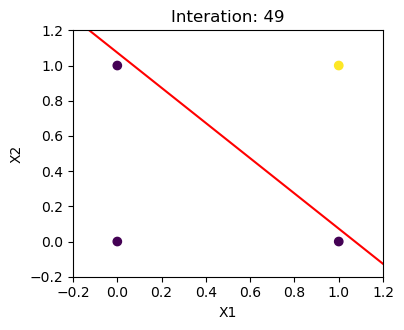

Iteration: 50 | Weights: [0.46585501 0.46585501] | Bias: -0.5000000000000002


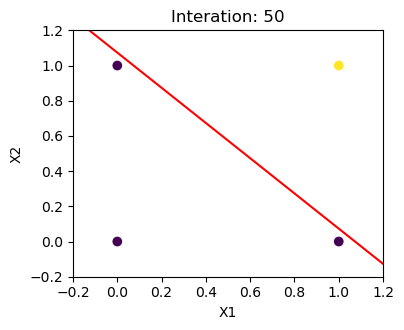

Iteration: 51 | Weights: [0.47512468 0.47512468] | Bias: -0.5100000000000002


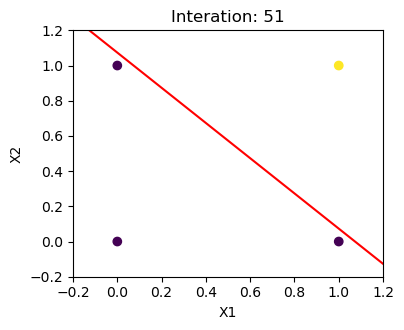

Iteration: 52 | Weights: [0.48439415 0.48439415] | Bias: -0.5200000000000002


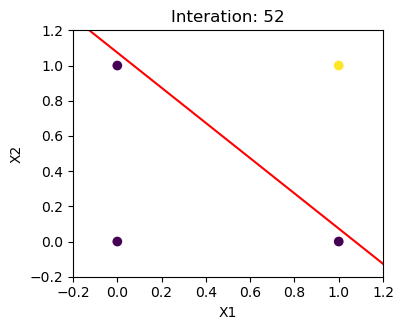

Iteration: 53 | Weights: [0.4936634 0.4936634] | Bias: -0.5300000000000002


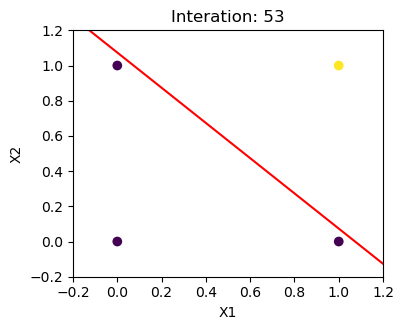

Iteration: 54 | Weights: [0.50293245 0.50293245] | Bias: -0.5400000000000003


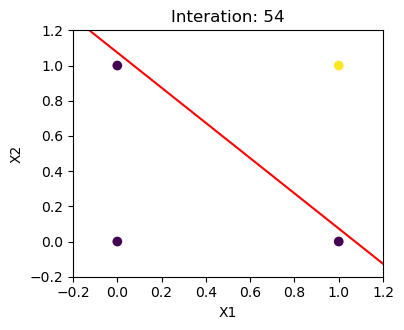

Iteration: 55 | Weights: [0.51220131 0.51220131] | Bias: -0.5500000000000003


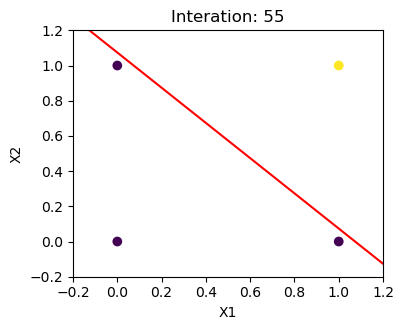

Iteration: 56 | Weights: [0.52146999 0.52146999] | Bias: -0.5600000000000003


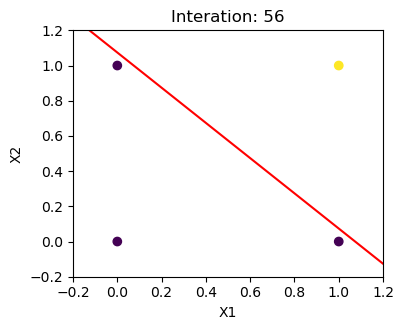

Iteration: 57 | Weights: [0.53073848 0.53073848] | Bias: -0.5700000000000003


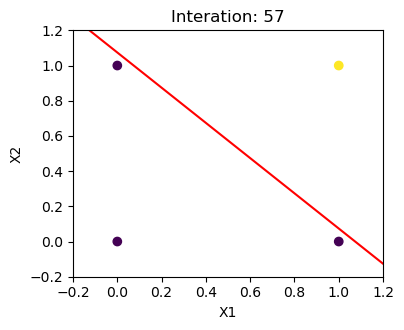

Iteration: 58 | Weights: [0.54000681 0.54000681] | Bias: -0.5800000000000003


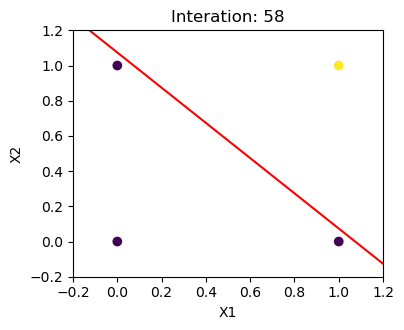

Iteration: 59 | Weights: [0.54927497 0.54927497] | Bias: -0.5900000000000003


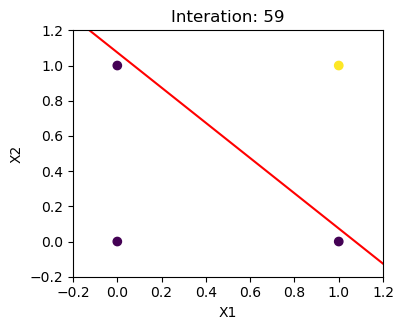

Iteration: 60 | Weights: [0.55854297 0.55854297] | Bias: -0.6000000000000003


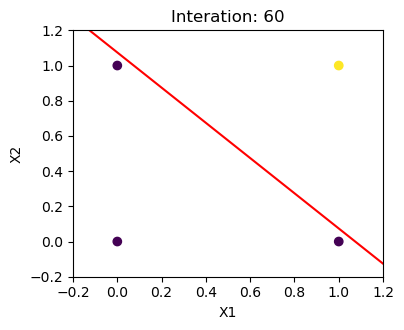

Iteration: 61 | Weights: [0.56781081 0.56781081] | Bias: -0.6100000000000003


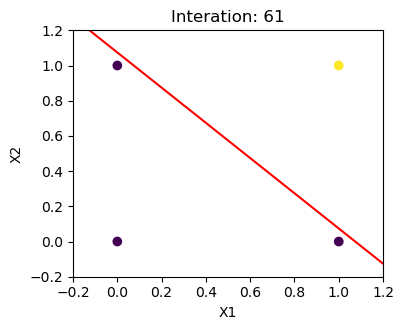

Iteration: 62 | Weights: [0.57707851 0.57707851] | Bias: -0.6200000000000003


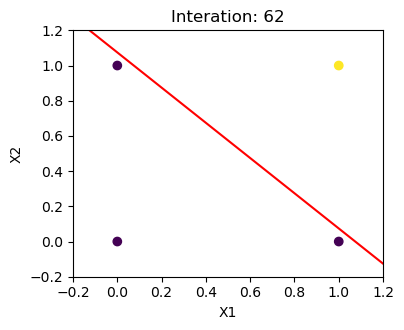

Iteration: 63 | Weights: [0.58634606 0.58634606] | Bias: -0.6300000000000003


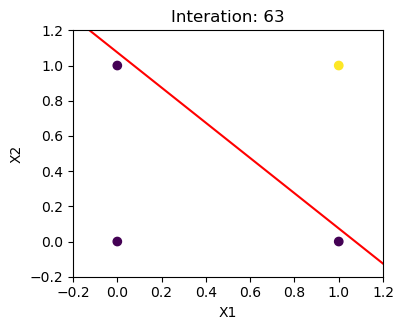

Iteration: 64 | Weights: [0.59561347 0.59561347] | Bias: -0.6400000000000003


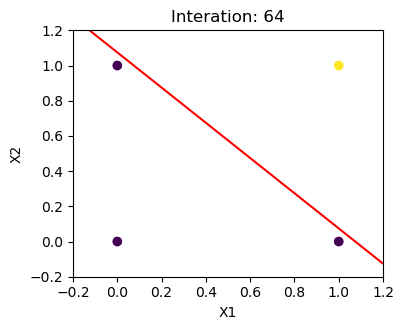

Iteration: 65 | Weights: [0.60488075 0.60488075] | Bias: -0.6500000000000004


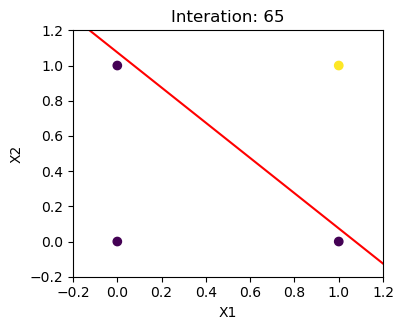

Iteration: 66 | Weights: [0.61414789 0.61414789] | Bias: -0.6600000000000004


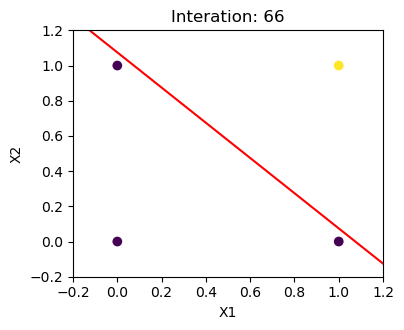

Iteration: 67 | Weights: [0.62341491 0.62341491] | Bias: -0.6700000000000004


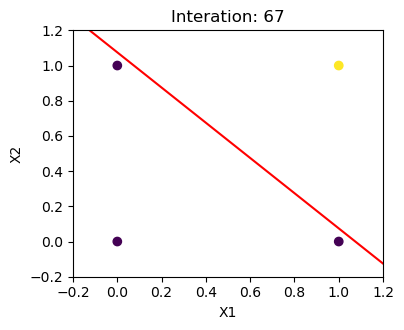

Iteration: 68 | Weights: [0.6326818 0.6326818] | Bias: -0.6800000000000004


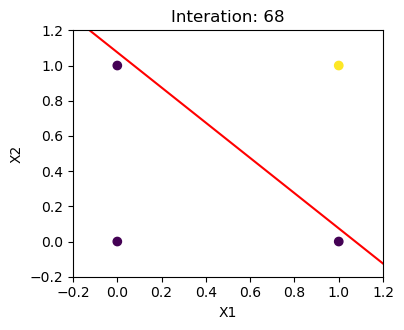

Iteration: 69 | Weights: [0.64194858 0.64194858] | Bias: -0.6900000000000004


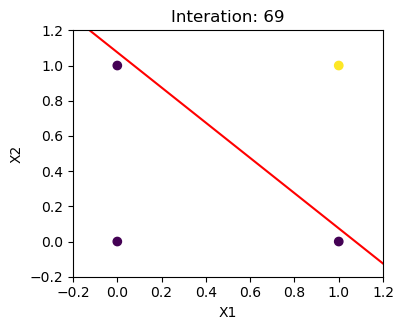

Iteration: 70 | Weights: [0.65121524 0.65121524] | Bias: -0.7000000000000004


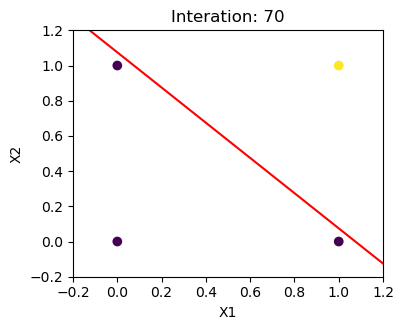

Iteration: 71 | Weights: [0.66048178 0.66048178] | Bias: -0.7100000000000004


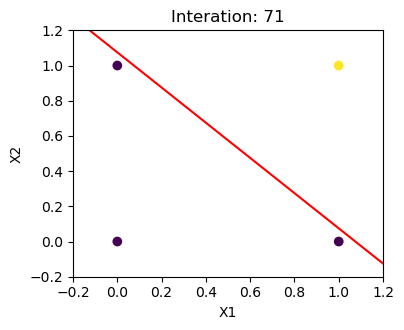

Iteration: 72 | Weights: [0.66974822 0.66974822] | Bias: -0.7200000000000004


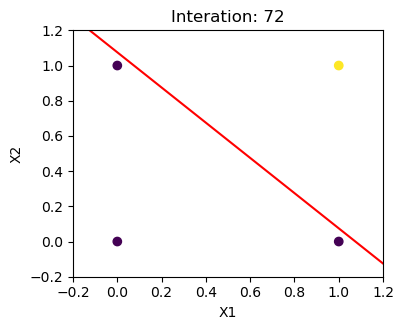

Iteration: 73 | Weights: [0.67901455 0.67901455] | Bias: -0.7300000000000004


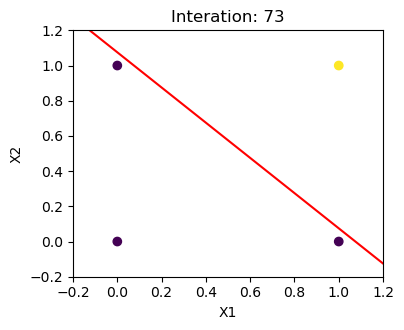

Iteration: 74 | Weights: [0.68828078 0.68828078] | Bias: -0.7400000000000004


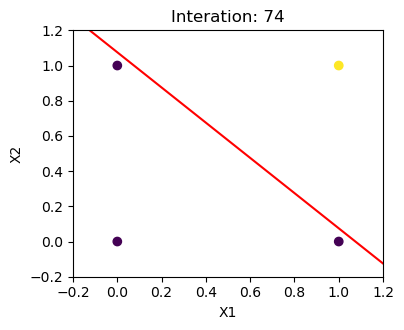

Iteration: 75 | Weights: [0.69754691 0.69754691] | Bias: -0.7500000000000004


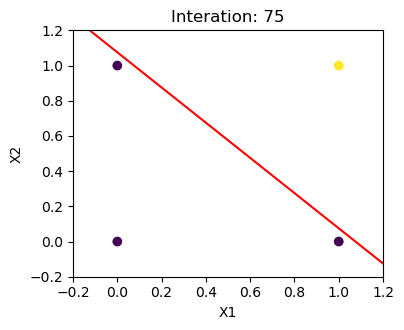

Iteration: 76 | Weights: [0.70681294 0.70681294] | Bias: -0.7600000000000005


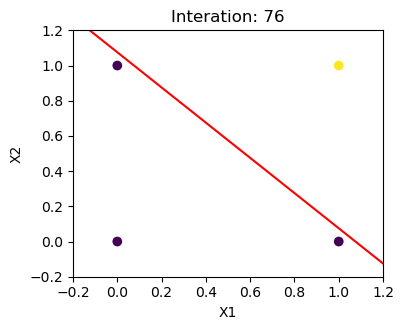

Iteration: 77 | Weights: [0.71607887 0.71607887] | Bias: -0.7700000000000005


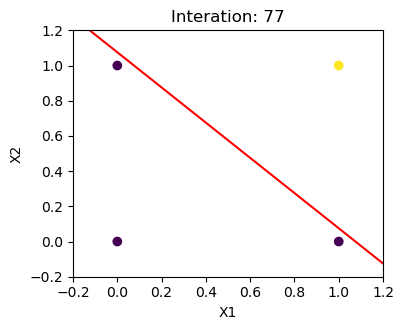

Iteration: 78 | Weights: [0.72534471 0.72534471] | Bias: -0.7800000000000005


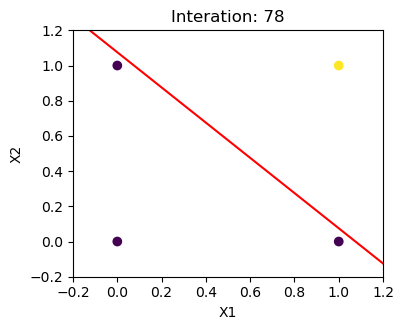

Iteration: 79 | Weights: [0.73461047 0.73461047] | Bias: -0.7900000000000005


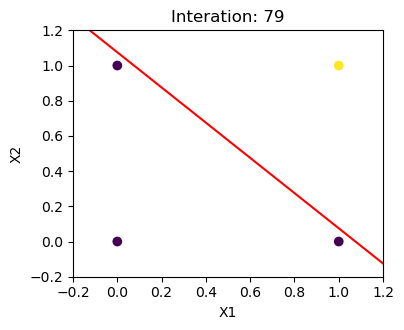

Iteration: 80 | Weights: [0.74387613 0.74387613] | Bias: -0.8000000000000005


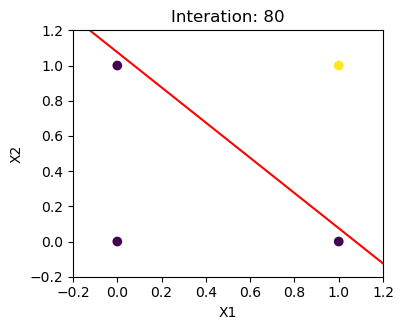

Iteration: 81 | Weights: [0.75314171 0.75314171] | Bias: -0.8100000000000005


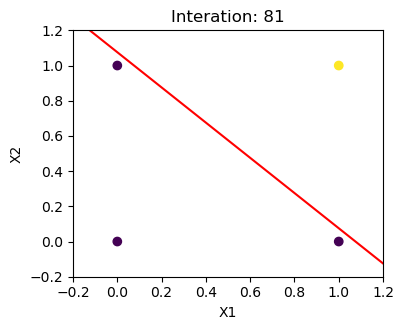

Iteration: 82 | Weights: [0.76240721 0.76240721] | Bias: -0.8200000000000005


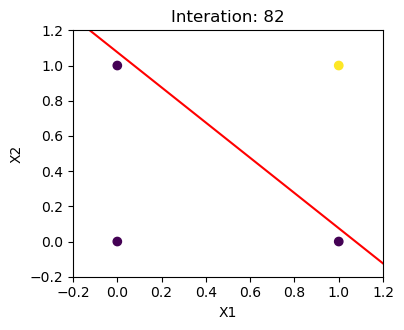

Iteration: 83 | Weights: [0.77167262 0.77167262] | Bias: -0.8300000000000005


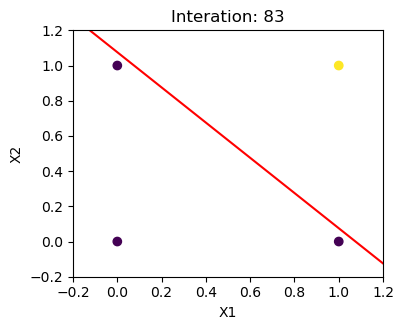

Iteration: 84 | Weights: [0.78093796 0.78093796] | Bias: -0.8400000000000005


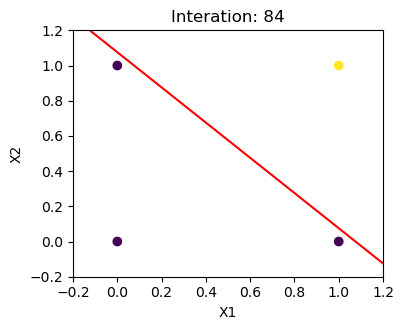

Iteration: 85 | Weights: [0.79020322 0.79020322] | Bias: -0.8500000000000005


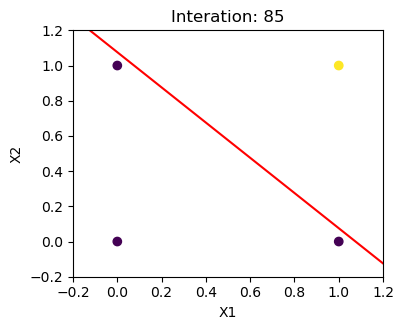

Iteration: 86 | Weights: [0.7994684 0.7994684] | Bias: -0.8600000000000005


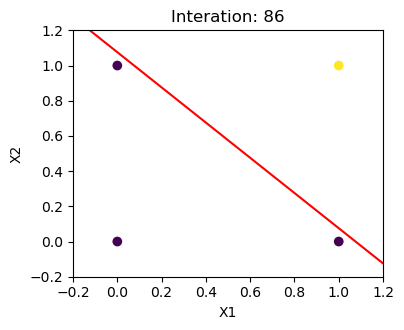

Iteration: 87 | Weights: [0.80873351 0.80873351] | Bias: -0.8700000000000006


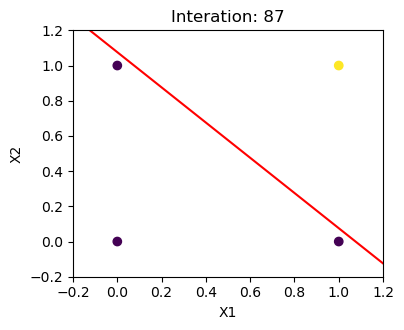

Iteration: 88 | Weights: [0.81799855 0.81799855] | Bias: -0.8800000000000006


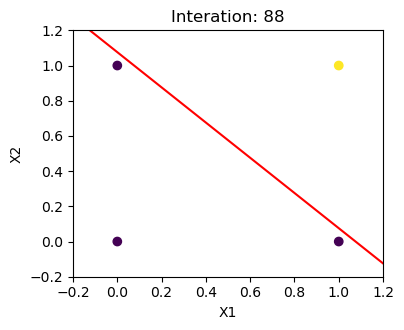

Iteration: 89 | Weights: [0.82726352 0.82726352] | Bias: -0.8900000000000006


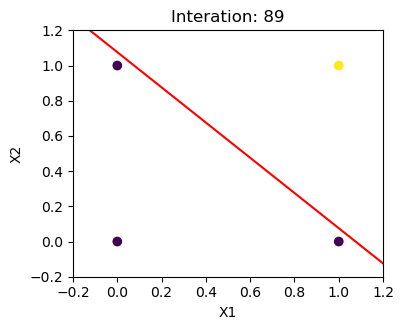

Iteration: 90 | Weights: [0.83652842 0.83652842] | Bias: -0.9000000000000006


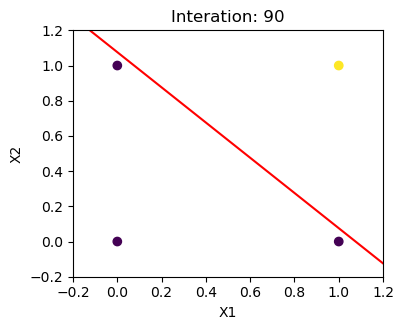

Iteration: 91 | Weights: [0.84579325 0.84579325] | Bias: -0.9100000000000006


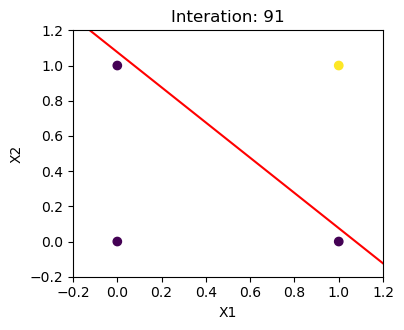

Iteration: 92 | Weights: [0.85505802 0.85505802] | Bias: -0.9200000000000006


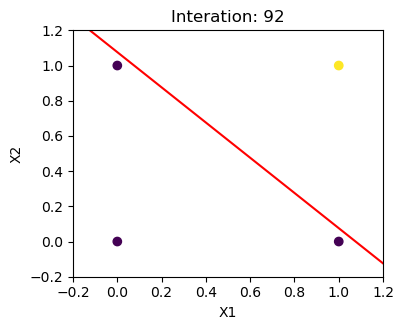

Iteration: 93 | Weights: [0.86432272 0.86432272] | Bias: -0.9300000000000006


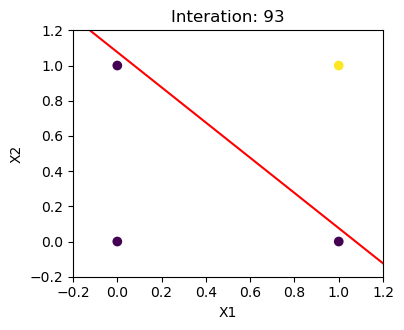

Iteration: 94 | Weights: [0.87358736 0.87358736] | Bias: -0.9400000000000006


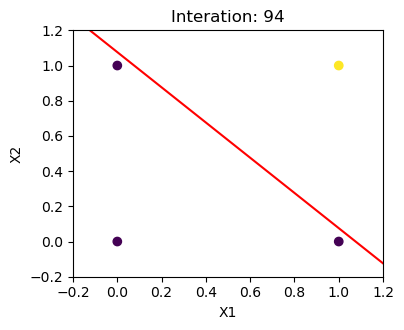

Iteration: 95 | Weights: [0.88285194 0.88285194] | Bias: -0.9500000000000006


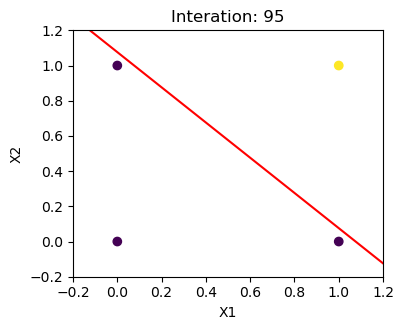

Iteration: 96 | Weights: [0.89211646 0.89211646] | Bias: -0.9600000000000006


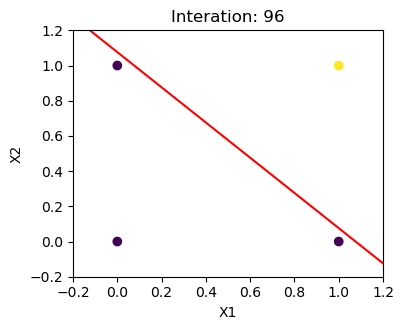

Iteration: 97 | Weights: [0.90138092 0.90138092] | Bias: -0.9700000000000006


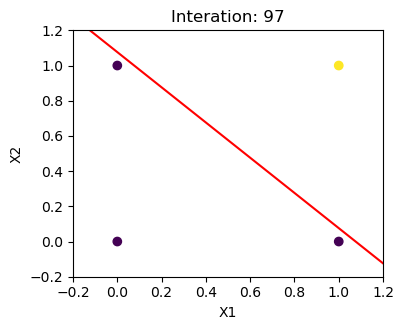

Iteration: 98 | Weights: [0.91064533 0.91064533] | Bias: -0.9800000000000006


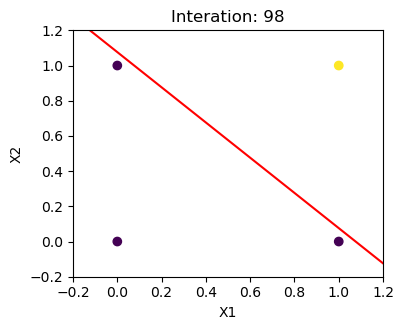

Iteration: 99 | Weights: [0.91990967 0.91990967] | Bias: -0.9900000000000007


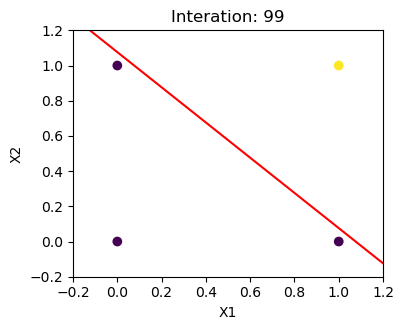

Iteration: 100 | Weights: [0.92917397 0.92917397] | Bias: -1.0000000000000007


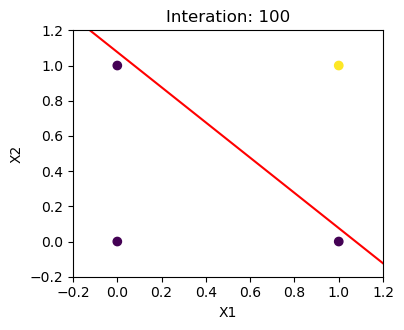

In [10]:
svm = LinearSVM(max_epochs=100)
svm.fit(X, y)

In [11]:
y_pred = svm.predict(X)
print(f"Predicted: {y_pred}")
print(f"Actual: {y}")

Predicted: [0 0 0 1]
Actual: [0 0 0 1]


In [12]:
acc = accuracy(y, y_pred)
print(f"Accuracy percentage: {acc * 100}%")

Accuracy percentage: 100.0%
